churn refers to the number of customers who stop using a company's products or services over a period of time.Customer churn refers to the percentage of customers who stop using a company’s service during a given timeframe. It can happen for various reasons including dissatisfaction with the product, better offers from competitors or changes in customer needs. Reducing churn is particularly important in competitive industries as acquiring new customers can often be more expensive than retaining existing ones
"churn 0" represents a customer who has not churned (meaning they are still actively using a service), while "churn 1" indicates a customer who has churned (stopped using the service)
whether or not the customer left the bank. (0=No,1=Yes)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.svm import SVC

In [2]:
df=pd.read_csv("Bank Churn Modelling.csv")
df.head(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [37]:
df.shape

(10000, 13)

In [38]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
df.nunique()

CustomerId          10000
Surname              2932
CreditScore           460
Geography               3
Gender                  2
Age                    70
Tenure                 11
Balance              6382
Num Of Products         4
Has Credit Card         2
Is Active Member        2
Estimated Salary     9999
Churn                   2
dtype: int64

In [49]:
df.duplicated('CustomerId').sum()

0

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [51]:
df=df.set_index("CustomerId")

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [53]:
df.isnull().sum()

Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
Num Of Products     0
Has Credit Card     0
Is Active Member    0
Estimated Salary    0
Churn               0
dtype: int64

In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
Num Of Products,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
Has Credit Card,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
Is Active Member,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
Estimated Salary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Churn,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [55]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [4]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [15]:
df["Num Of Products"].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [66]:
df['Has Credit Card'].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [6]:
df['Is Active Member'].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [12]:
df.loc[(df["Balance"]==0), 'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [13]:
df['Zero Balance'] = np.where(df['Balance']>0, 1, 0)

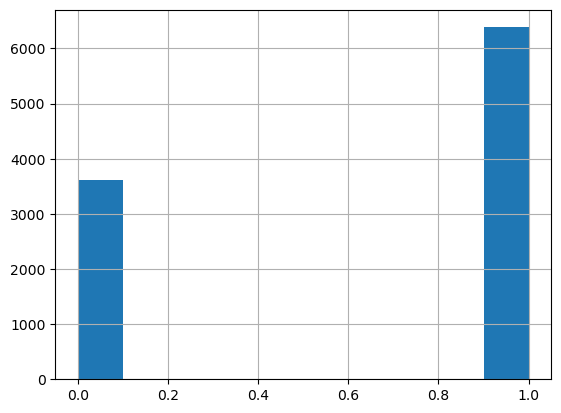

In [14]:
df['Zero Balance'].hist()
plt.show()

In [85]:
df.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     France        4204         4204    4204  4204    4204     4204   
      Germany       1695         1695    1695  1695    1695     1695   
      Spain         2064         2064    2064  2064    2064     2064   
1     France         810          810     810   810     810      810   
      Germany        814          814     814   814     814      814   
      Spain          413          413     413   413     413      413   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     France                4204             4204              4204   
      Germany               1695             1695              1695   
      Spain                 2064             2064              2064   
1     France                 810              810               810   
      Germany                814              814               814   
      Spain                  413              413               413   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     France                 4204          4204  
      Germany                1695          1695  
      Spain                  2064          2064  
1     France                  810           810  
      Germany                 814           814  
      Spain                   413           413

In [18]:
df_dummy=pd.get_dummies(df, columns=["Num Of Products","Geography", "Gender"], dtype = int)
df_dummy.head()

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,Has Credit Card,Is Active Member,Estimated Salary,Churn,Num Of Products_1,Num Of Products_2,Num Of Products_3,Num Of Products_4,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15634602,Hargrave,619,42,2,0.00,1,1,101348.88,1,1,0,0,0,1,0,0,1,0
1,15647311,Hill,608,41,1,83807.86,0,1,112542.58,0,1,0,0,0,0,0,1,1,0
2,15619304,Onio,502,42,8,159660.80,1,0,113931.57,1,0,0,1,0,1,0,0,1,0
3,15701354,Boni,699,39,1,0.00,0,0,93826.63,0,0,1,0,0,1,0,0,1,0
4,15737888,Mitchell,850,43,2,125510.82,1,1,79084.10,0,1,0,0,0,0,0,1,1,0


In [22]:
df_dummy.drop(columns=["Surname"],inplace = True)

In [19]:
df_dummy.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'Has Credit Card', 'Is Active Member', 'Estimated Salary', 'Churn',
       'Num Of Products_1', 'Num Of Products_2', 'Num Of Products_3',
       'Num Of Products_4', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [20]:
df_dummy.head()

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,Has Credit Card,Is Active Member,Estimated Salary,Churn,Num Of Products_1,Num Of Products_2,Num Of Products_3,Num Of Products_4,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15634602,Hargrave,619,42,2,0.00,1,1,101348.88,1,1,0,0,0,1,0,0,1,0
1,15647311,Hill,608,41,1,83807.86,0,1,112542.58,0,1,0,0,0,0,0,1,1,0
2,15619304,Onio,502,42,8,159660.80,1,0,113931.57,1,0,0,1,0,1,0,0,1,0
3,15701354,Boni,699,39,1,0.00,0,0,93826.63,0,0,1,0,0,1,0,0,1,0
4,15737888,Mitchell,850,43,2,125510.82,1,1,79084.10,0,1,0,0,0,0,0,1,1,0


In [ ]:
Splitting into x and y

In [21]:
cols=['CreditScore', 'Age', 'Tenure', 'Balance', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Balance',
       'Num Of Products_1', 'Num Of Products_2', 'Num Of Products_3',
       'Num Of Products_4', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Gender_Female', 'Gender_Male']
x=df_dummy[cols]
y=df_dummy["Churn"]

In [27]:
x.shape

(10000, 17)

In [101]:
y.shape

(10000,)

In [22]:
x.head()

,CreditScore,Age,Tenure,Balance,Has Credit Card,Is Active Member,Estimated Salary,Balance,Num Of Products_1,Num Of Products_2,Num Of Products_3,Num Of Products_4,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,101348.88,0.00,1,0,0,0,1,0,0,1,0
1,608,41,1,83807.86,0,1,112542.58,83807.86,1,0,0,0,0,0,1,1,0
2,502,42,8,159660.80,1,0,113931.57,159660.80,0,0,1,0,1,0,0,1,0
3,699,39,1,0.00,0,0,93826.63,0.00,0,1,0,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,79084.10,125510.82,1,0,0,0,0,0,1,1,0


In [98]:
y.head()

CustomerId
15634602    1
15647311    0
15619304    1
15701354    0
15737888    0
Name: Churn, dtype: int64

In [39]:
df['Churn'].value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

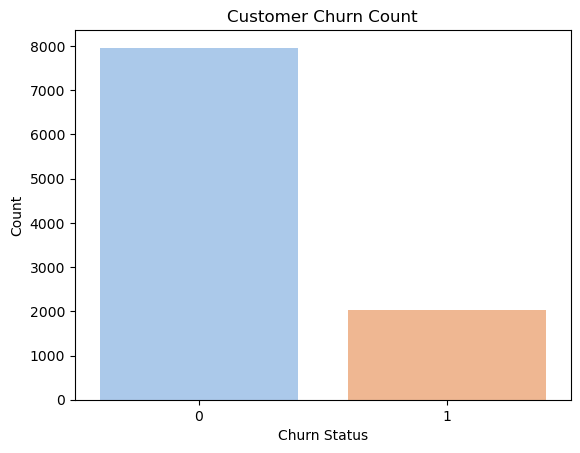

In [41]:
sns.countplot(x = 'Churn', data = df,palette='pastel')
plt.title('Customer Churn Count')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.show()

In [ ]:
Random Under Sampling

In [24]:
from imblearn.under_sampling import RandomUnderSampler

In [25]:
rus = RandomUnderSampler(random_state=2529)
x_rus, y_rus = rus.fit_resample(x, y)

In [36]:
x_rus.shape,y_rus.shape,x.shape,y.shape,

((4074, 17), (4074,), (10000, 17), (10000,))

In [37]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [48]:
y_rus.value_counts()

Churn
0    2037
1    2037
Name: count, dtype: int64

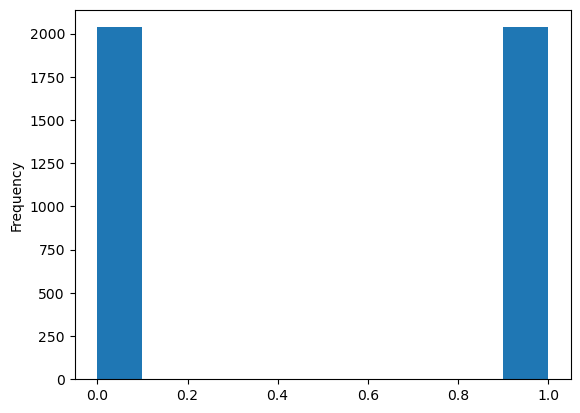

In [38]:
y_rus.plot(kind = 'hist')
plt.show()

In [ ]:
Random Over Sampling

In [40]:
from imblearn.over_sampling import RandomOverSampler

In [41]:
ros = RandomOverSampler(random_state = 2529)
x_ros, y_ros = ros.fit_resample(x, y)

In [56]:
x_ros.shape, y_ros.shape, x.shape, y.shape

((15926, 17), (15926,), (10000, 17), (10000,))

In [58]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [59]:
y_ros.value_counts()

Churn
1    7963
0    7963
Name: count, dtype: int64

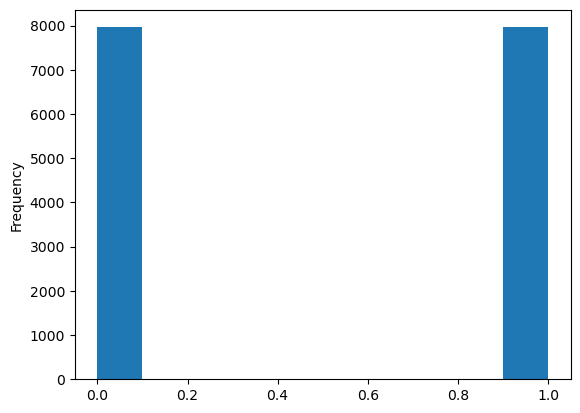

In [57]:
y_ros.plot(kind = 'hist')
plt.show()

In [ ]:
Train/Test split

In [ ]:
Orginal Data

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [15]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7000, 17), (3000, 17), (7000,), (3000,))

In [ ]:
Split Random under sample data

In [42]:
x_train_rus, x_test_rus, y_train_rus, y_test_rus = train_test_split(x_rus, y_rus, test_size=0.3,random_state=1)

In [68]:
x_train_rus.shape, x_test_rus.shape, y_train_rus.shape, y_test_rus.shape

((2851, 17), (1223, 17), (2851,), (1223,))

In [ ]:
Split Random over sample data

In [73]:
x_train_ros, x_test_ros, y_train_ros, y_test_ros = train_test_split(x_ros, y_ros, test_size=0.3,random_state=1)

In [71]:
x_train_ros.shape, x_test_ros.shape, y_train_ros.shape, y_test_ros.shape

((11148, 17), (4778, 17), (11148,), (4778,))

In [ ]:
Standardize Original Data

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [27]:
x_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [28]:
x_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [ ]:
Standardize Random under sample dataData

In [43]:
x_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [44]:
x_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [ ]:
Standardize Random over sample data Data

In [92]:
x_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [93]:
x_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [ ]:
Building a Model

In [ ]:
Logistic Regression Model

In [46]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
y_train_pred=log_reg.predict(x_train)
y_test_pred=log_reg.predict(x_test)

In [47]:
accuracy = accuracy_score(y_train, y_train_pred)
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

In [48]:
accuracy = accuracy_score(y_train, y_train_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

Logistic Regression Accuracy: 84.14%


In [117]:
print(conf_matrix)

[[2293   80]
 [ 396  231]]


In [118]:
print(class_report)

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2373
           1       0.74      0.37      0.49       627

    accuracy                           0.84      3000
   macro avg       0.80      0.67      0.70      3000
weighted avg       0.83      0.84      0.82      3000



In [119]:
log_reg=LogisticRegression()
log_reg.fit(x_train_rus,y_train_rus)
y_train_pred=log_reg.predict(x_train_rus)
y_test_pred=log_reg.predict(x_test_rus)

In [120]:
accuracy = accuracy_score(y_train_rus, y_train_pred)
accuracy = accuracy_score(y_test_rus, y_test_pred)
conf_matrix = confusion_matrix(y_test_rus, y_test_pred)
class_report = classification_report(y_test_rus, y_test_pred)

In [121]:
accuracy = accuracy_score(y_train_rus, y_train_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

Logistic Regression Accuracy: 75.27%


In [122]:
print(conf_matrix)

[[490 132]
 [142 459]]


In [123]:
print(class_report)

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       622
           1       0.78      0.76      0.77       601

    accuracy                           0.78      1223
   macro avg       0.78      0.78      0.78      1223
weighted avg       0.78      0.78      0.78      1223



In [126]:
log_reg=LogisticRegression()
log_reg.fit(x_train_ros,y_train_ros)
y_train_pred=log_reg.predict(x_train_ros)
y_test_pred=log_reg.predict(x_test_ros)

In [127]:
accuracy = accuracy_score(y_train_ros, y_train_pred)
accuracy = accuracy_score(y_test_ros, y_test_pred)
conf_matrix = confusion_matrix(y_test_ros, y_test_pred)
class_report = classification_report(y_test_ros, y_test_pred)

In [128]:
accuracy = accuracy_score(y_train_ros, y_train_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

Logistic Regression Accuracy: 76.30%


In [129]:
print(conf_matrix)

[[1786  536]
 [ 642 1814]]


In [130]:
print(class_report)

              precision    recall  f1-score   support

           0       0.74      0.77      0.75      2322
           1       0.77      0.74      0.75      2456

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



In [ ]:
Random Forest Model

In [16]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_train_pred=rf.predict(x_train)
y_test_pred=rf.predict(x_test)

In [132]:
accuracy = accuracy_score(y_test, y_test_pred)

In [134]:
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")

Random Forest Accuracy: 86.00%


In [ ]:
Support Vector Machine Classifier

In [8]:
svc = SVC()

In [28]:
svc.fit(x_train, y_train)
y_train_pred = svc.predict(x_train)
y_test_pred = svc.predict(x_test)

In [58]:
accuracy = accuracy_score(y_train, y_train_pred)
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

In [59]:
accuracy = accuracy_score(y_train, y_train_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

Logistic Regression Accuracy: 86.84%


In [60]:
print(conf_matrix)

[[2312   61]
 [ 369  258]]


In [61]:
print(class_report)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2373
           1       0.81      0.41      0.55       627

    accuracy                           0.86      3000
   macro avg       0.84      0.69      0.73      3000
weighted avg       0.85      0.86      0.84      3000



In [ ]:
Hyperparameter Tuning

In [5]:
from sklearn.model_selection import GridSearchCV

In [29]:
param_grid = {'C':[0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['rbf'],'class_weight':['balanced']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid.fit(x_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.7s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.6s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.7s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.7s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.5s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [30]:
print(grid.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [31]:
grid_predictions = grid.predict(x_test)

In [148]:
confusion_matrix(y_test, grid_predictions)

array([[2126,  247],
       [ 337,  290]], dtype=int64)

In [149]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2373
           1       0.54      0.46      0.50       627

    accuracy                           0.81      3000
   macro avg       0.70      0.68      0.69      3000
weighted avg       0.80      0.81      0.80      3000



In [ ]:
SVM-Random under Sampling data

In [67]:
svc.fit(x_train_rus, y_train_rus)
y_train_pred = svc.predict(x_train_rus)
y_test_pred = svc.predict(x_test_rus)

In [68]:
accuracy = accuracy_score(y_train_rus, y_train_pred)
accuracy = accuracy_score(y_test_rus, y_test_pred)
conf_matrix = confusion_matrix(y_test_rus, y_test_pred)
class_report = classification_report(y_test_rus, y_test_pred)

In [69]:
accuracy = accuracy_score(y_train_rus, y_train_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

Logistic Regression Accuracy: 80.25%


In [70]:
print(conf_matrix)

[[503 119]
 [127 474]]


In [173]:
print(class_report)

              precision    recall  f1-score   support

           0       0.77      0.80      0.79      2322
           1       0.81      0.78      0.79      2456

    accuracy                           0.79      4778
   macro avg       0.79      0.79      0.79      4778
weighted avg       0.79      0.79      0.79      4778



In [ ]:
Hyperparameter Tuning

In [71]:
param_grid = {'C':[0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['rbf'],'class_weight':['balanced']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid.fit(x_train_rus,y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [156]:
print(grid.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [175]:
grid_predictions = grid.predict(x_test_rus)

In [176]:
confusion_matrix(y_test_rus, grid_predictions)

array([[508, 114],
       [133, 468]], dtype=int64)

In [177]:
print(classification_report(y_test_rus, grid_predictions))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       622
           1       0.80      0.78      0.79       601

    accuracy                           0.80      1223
   macro avg       0.80      0.80      0.80      1223
weighted avg       0.80      0.80      0.80      1223



In [ ]:
SVM-Random over Sampling data

In [178]:
svc.fit(x_train_ros, y_train_ros)
y_train_pred = svc.predict(x_train_ros)
y_test_pred = svc.predict(x_test_ros)

In [179]:
accuracy = accuracy_score(y_train_ros, y_train_pred)
accuracy = accuracy_score(y_test_ros, y_test_pred)
conf_matrix = confusion_matrix(y_test_ros, y_test_pred)
class_report = classification_report(y_test_ros, y_test_pred)

In [180]:
accuracy = accuracy_score(y_train_ros, y_train_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

Logistic Regression Accuracy: 81.80%


In [183]:
print(conf_matrix)

[[1862  460]
 [ 547 1909]]


In [182]:
print(class_report)

              precision    recall  f1-score   support

           0       0.77      0.80      0.79      2322
           1       0.81      0.78      0.79      2456

    accuracy                           0.79      4778
   macro avg       0.79      0.79      0.79      4778
weighted avg       0.79      0.79      0.79      4778



In [ ]:
Hyperparameter Tuning

In [74]:
param_grid = {'C':[0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['rbf'],'class_weight':['balanced']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid.fit(x_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.2s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.3s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [185]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [186]:
grid_predictions = grid.predict(x_test_ros)

In [187]:
confusion_matrix(y_test_ros, grid_predictions)

array([[2036,  286],
       [  84, 2372]], dtype=int64)

In [ ]:
print(classification_report(y_test_ros, grid_predictions))

In [ ]:
Model Evaluation

we have used Hyperparameter tuning in Random over Sampling ,
overall accuracy of 89% 
recall is 97% and precision=89%

In [ ]:
import pickle 
pickle_out = open("svc.pkl", "wb") 
pickle.dump(svc, pickle_out) 
pickle_out.close()